The plots here will be 2D contour plots showing the probability of detection given the pool size and the flow rate, with panels for different times after the fish has left the pond.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # To make the colorbar
%matplotlib inline

In [2]:
# Define parameters from other tests.
# These are from the final code
s = 1.3e8/60 #copies/hour, converted to /min
k = 0.03/60 #1/hour, converted to /min
# Limit of detection
lod = 8-1 # This is 7 and not 8 because 8 means we have detected the fish

In [3]:
# With a threshold of one, the probability of a true positive is just the probability of getting at least one count
# I think this is also the case with a higher threshold?

def ct(p,t):
    # Concentration at time t with constant parameters
    cs = p['S']/(p['V']*p['k']+p['U'])
    return (p['c0']-cs)*np.exp(-t*(p['k']+p['U']/p['V']))+cs

def ct_eq(v,u,p):
    # Concentraion in equilibrium. I left U and V out so I can pass them in as vectors
    return p['S']/(v*p['k']+u)


In [4]:
# Set up axes
vol = np.logspace(3,9,50)
flow = np.logspace(0,6,50)

# Set up grid and concentration at time = 0
X, Y = np.meshgrid(vol, flow)
ct_z = ct_eq(X,Y,{'S':s,'k':k})
Z = 1-st.poisson.cdf(lod,ct_z)

# Now after eight hours
ct_z8 = ct({'S':0,'k':k,'U':Y,'V':X,'c0':ct_z},60*8)
Z8 = 1-st.poisson.cdf(lod,ct_z8)

# Now after 16 hours
ct_z16 = ct({'S':0,'k':k,'U':Y,'V':X,'c0':ct_z},60*16)
Z16 = 1-st.poisson.cdf(lod,ct_z16)

In [5]:
# Correct units:
x = X/1000 # L -> m^3
y = Y/60000 # L/min -> m^3/s

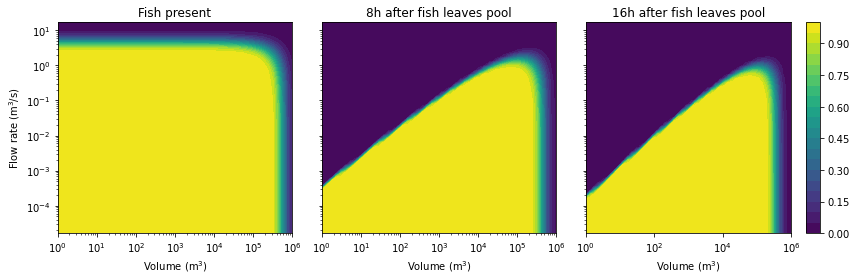

In [6]:
# Now plot as a three panel plot
fig,axs = plt.subplots(1,3,figsize=(12,4),sharey=True,tight_layout=True)

for z,ax in zip([Z,Z8,Z16],axs):
    cf = ax.contourf(x,y,z,20,vmin=0,vmax=1)
    ax.set_xlabel(r'Volume (m$^3$)')
    ax.set_xscale('log')
    ax.set_yscale('log')

axs[0].set_title('Fish present')
axs[1].set_title('8h after fish leaves pool')
axs[2].set_title('16h after fish leaves pool')

axs[0].set_ylabel(r'Flow rate (m$^3$/s)')

# Add in colorbar. It's guaranteed to be ok because I used vmin and vmax above.
divider = make_axes_locatable(axs[2])
# create an axes on the right side of ax. The width of cax will be 7%
# of ax and the padding between cax and ax will be fixed at 0.2 inch.
cax = divider.append_axes('right',size='7%',pad=0.2)
plt.colorbar(cf,cax=cax)

fig.savefig('Contours.pdf')

In [7]:
# Alt figures for longer times
# Now after 24
ct_z24= ct({'S':0,'k':k,'U':Y,'V':X,'c0':ct_z},60*24)
Z24 = 1-st.poisson.cdf(lod,ct_z24)

# Now after 48 hours
ct_z48 = ct({'S':0,'k':k,'U':Y,'V':X,'c0':ct_z},60*48)
Z48 = 1-st.poisson.cdf(lod,ct_z48)

# Now after 96 hours
ct_z72 = ct({'S':0,'k':k,'U':Y,'V':X,'c0':ct_z},60*96)
Z72 = 1-st.poisson.cdf(lod,ct_z72)

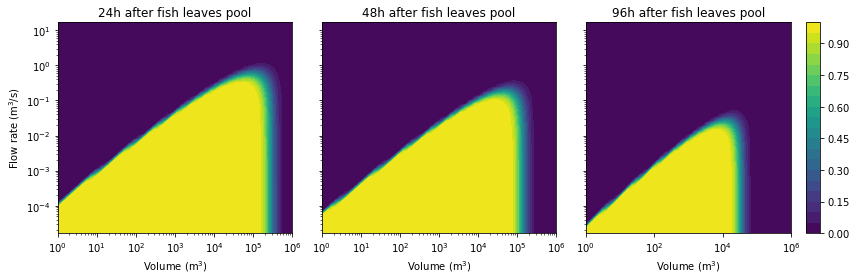

In [8]:
# Now plot as a three panel plot
fig,axs = plt.subplots(1,3,figsize=(12,4),sharey=True,tight_layout=True)

for z,ax in zip([Z24,Z48,Z72],axs):
    cf = ax.contourf(x,y,z,20,vmin=0,vmax=1)
    ax.set_xlabel(r'Volume (m$^3$)')
    ax.set_xscale('log')
    ax.set_yscale('log')

axs[0].set_title('24h after fish leaves pool')
axs[1].set_title('48h after fish leaves pool')
axs[2].set_title('96h after fish leaves pool')

axs[0].set_ylabel(r'Flow rate (m$^3$/s)')

# Add in colorbar. It's guaranteed to be ok because I used vmin and vmax above.
divider = make_axes_locatable(axs[2])
# create an axes on the right side of ax. The width of cax will be 7%
# of ax and the padding between cax and ax will be fixed at 0.2 inch.
cax = divider.append_axes('right',size='7%',pad=0.2)
plt.colorbar(cf,cax=cax)

fig.savefig('Contours_longtime.pdf')